# HIPOTESIS TEST

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
# colocando alguns defaults para as figuras
plt.rcParams['figure.figsize']  = (18, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [2]:
plt.ion()
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (12, 8)

In [3]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

# THE TEST


H0: Becoming an allstar is a random process which doesnt depend on a particular university

H1: Becoming an allstar depends on a particular university

To see the comportment of this, we perform a bootstrap mean  on the dataset of all allstar games played since 2000 to 2016


In [4]:
df = pd.read_csv("NBA_DRAFT_1980_2017.tsv",sep='\t')
df

,year,round,pick,player,position,school,allstar_appearance,allstar_by_school,draft_picks
0,1980,1,1.0,"Carroll, Joe Barry",F/C,Purdue,1,1,1
1,1980,1,2.0,"Griffith, Darrell",G,Louisville,0,0,1
2,1980,1,3.0,"McHale, Kevin",F/C,Minnesota,7,1,1
3,1980,1,4.0,"Ransey, Kelvin",G,Ohio State,0,0,1
4,1980,1,5.0,"Ray, James",F,Jacksonville,0,0,1
5,1980,1,6.0,"O'Koren, Mike",G/F,North Carolina,0,0,1
6,1980,1,7.0,"Gminski, Mike",C,Duke,0,0,1
7,1980,1,8.0,"Toney, Andrew",G,Southwestern Louisiana,2,1,1
8,1980,1,9.0,"Brooks, Michael",F,La Salle,0,0,1
9,1980,1,10.0,"Lester, Ronnie",G,Iowa,0,0,1


usando o draft picks dos anos 2000 ate 2016

In [5]:
df.drop(df.loc[df['year']<2000].index, inplace=True)
df.drop(df.loc[df['year']>2016].index, inplace=True)
df

,year,round,pick,player,position,school,allstar_appearance,allstar_by_school,draft_picks
1035,2000,1,1.0,"Martin, Kenyon",PF,Cincinnato (Sr.),1,1,1
1036,2000,1,2.0,"Swift, Stromile",PF/C,LSU,0,0,1
1037,2000,1,3.0,"Miles, Darius",SF/PF,East St. Louis HS (Illinois),0,0,1
1038,2000,1,4.0,"Fizer, Marcus",PF/SF,Iowa State,0,0,1
1039,2000,1,5.0,"Miller, Mike",SF/SG,Florida,0,0,1
1040,2000,1,6.0,"Johnson, DerMarr",SG/SF,Cincinnati,0,0,1
1041,2000,1,7.0,"Mihm, Chris",C/PF,Texas,0,0,1
1042,2000,1,8.0,"Crawford, Jamal",SG,Michigan,0,0,1
1043,2000,1,9.0,"Przybilla, Joel",C,Minnesota,0,0,1
1044,2000,1,10.0,"Dooling, Keyon",SG,Missouri,0,0,1


In [6]:
df = df.groupby(['school']).sum()
df

,year,round,pick,allstar_appearance,allstar_by_school,draft_picks
school,,,,,,
AEK,4003,3,83.0,0,0,2
ASA BH Telecom,2006,2,56.0,0,0,1
ASC Denain-Voltaire,2016,2,44.0,0,0,1
ASVEL Basket,2013,1,28.0,0,0,1
Adecco Estudiantes,2006,1,27.0,0,0,1
Akasvayu Girona,2007,2,48.0,3,1,1
Al Rayyan,2011,2,57.0,0,0,1
Alabama,10021,9,196.0,2,2,5
Albacomp,2011,2,59.0,0,0,1


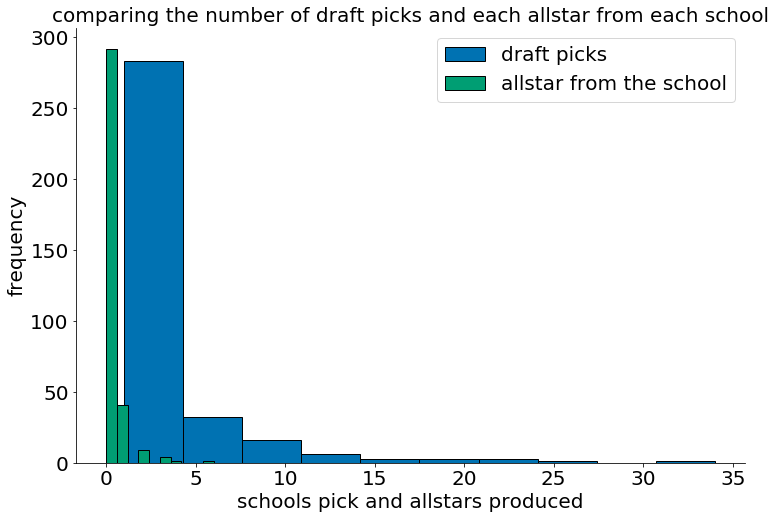

In [7]:
plt.hist(df['draft_picks'], edgecolor='k', label='draft picks')
plt.hist(df['allstar_by_school'], edgecolor='k', label='allstar from the school')
despine()
plt.title('comparing the number of draft picks and each allstar from each school')
plt.xlabel('schools pick and allstars produced')
plt.ylabel('frequency')
plt.legend()
plt.show()

agora podemos fazer um bootstraping no para ver o comportamento de ser allstar 
ai computamos o ic para isso

In [8]:
def ic(df, pick):
    data = df[pick]
    mean = data.mean()
    std = data.std(ddof=1)
    se = std / np.sqrt(len(data))
    
    return (mean - 1.96 * se, mean + 1.96 * se)

In [9]:
ic(df,'allstar_by_school')

(0.16457249756095732, 0.300944743818353)

performing boostrap of mean for the allstars by each school

In [10]:
def bootstrap_mean(df,column, n):
    values = np.zeros(n)
    for i in range(n):
        sample = df[column].sample(len(df), replace=True)
        values[i] = sample.mean()
    return values

In [11]:
bootstrap_mean(df,'allstar_by_school', 10000)

array([0.17241379, 0.27873563, 0.23275862, ..., 0.23275862, 0.25287356,
       0.25287356])

In [12]:
mean = df['allstar_by_school'].mean()

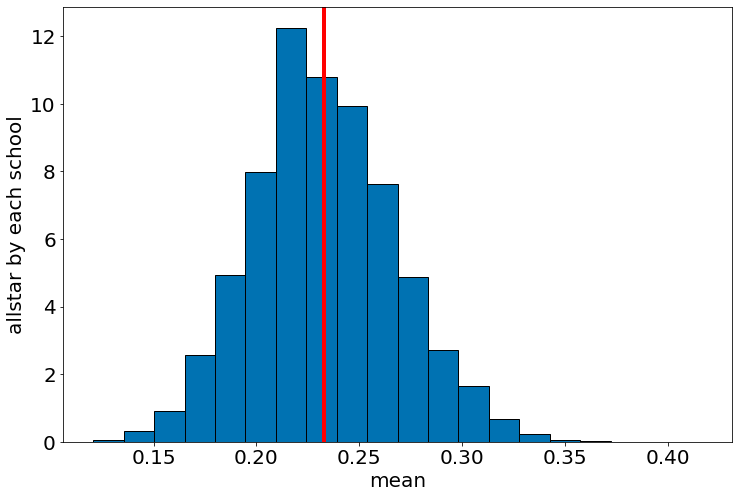

In [13]:
values = bootstrap_mean(df,'allstar_by_school', 10000)
plt.hist(values, bins=20, density=True, edgecolor='k')
plt.axvline(mean, color='red')
plt.ylabel('allstar by each school')
plt.xlabel('mean')
plt.show()

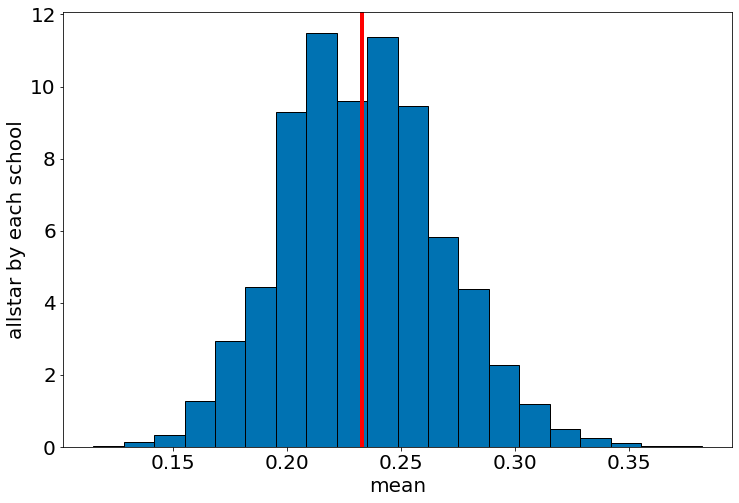

In [14]:
values = bootstrap_mean(df,'allstar_by_school', 5000)
plt.hist(values, bins=20, density=True, edgecolor='k')
plt.axvline(mean, color='red')
plt.ylabel('allstar by each school')
plt.xlabel('mean')
plt.show()